In [489]:
import random
from antsystem import AntColonySystem
import matplotlib.pyplot as plt; plt.close('all')
import networkx as nx
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [490]:
n = 5
c = [(n*random.random(), n*random.random()) for i in range(n)]
a = AntColonySystem(n, c)
solution = a.findSolution()

graph = []
for i in range(len(a.cityLocations)):
    for j in range(i+1, len(a.cityLocations)):
        graph.append((i, j, {'p':round(a.distance(i, j), 3)}))
graph

Melhor percurso encontrado:  [0, 1, 2, 3, 4, 0]
Tem um tamanho de:  12.635662936189094
Encontrado em  0.04688549999991665  segundos


[(0, 1, {'p': 3.637}),
 (0, 2, {'p': 4.181}),
 (0, 3, {'p': 3.869}),
 (0, 4, {'p': 3.125}),
 (1, 2, {'p': 4.196}),
 (1, 3, {'p': 4.62}),
 (1, 4, {'p': 4.431}),
 (2, 3, {'p': 0.86}),
 (2, 4, {'p': 1.503}),
 (3, 4, {'p': 0.818})]

In [491]:
G = nx.Graph()
G.add_edges_from(graph)

C:\Users\nikol\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


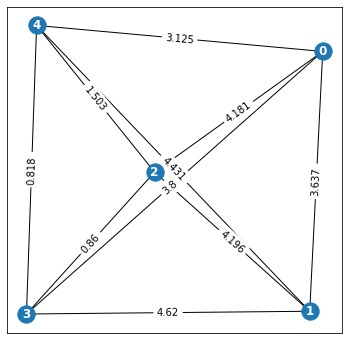

In [492]:
node_colors = ['r', 'g', 'b', 'y']
fig, ax = plt.subplots(figsize=(6,6))
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos)

labels = dict(map(lambda e: [(e[0], e[1]), e[2]['p']], graph))
node_labels = nx.draw_networkx_labels(G, pos, font_color='w', font_weight='bold')
edge_labels = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [500]:
best_tour = a.bestTourList()
colors = []
for i in best_tour:
    arr = np.zeros(n, dtype=int)
    arr[i] = 29
    colors.append(arr)
colors = np.array(colors)

In [510]:
def update(i):
    if(i == 0):
        custo = 0
        ax.set_title("Custo: " + str(custo))
    if(i != len(colors) - 1):
        custo = custo + a.distance(i, i+1)
        ax.set_title("Custo: " + str(custo))
    else:
        custo = 0
    nodes.set_array(colors[i])
    return nodes,

In [511]:
custo = 0
anim = FuncAnimation(fig, update, interval=1000, frames=len(colors), blit=True)

In [512]:
HTML(anim.to_html5_video())

UnboundLocalError: local variable 'custo' referenced before assignment